## Test Whether Algorithmic Advances Are Orthogonal 

Look at rotary sgd transformer 
look at computational advantage of lstm sgd

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob



In [8]:

# lstm_16d_adam = pd.read_csv("../experimental_data_folder/LSTM_Optimizer_Experiments/LSTM_adam.csv")

# lstm_16d_sgd = pd.read_csv("../experimental_data_folder/LSTM_Optimizer_Experiments/LSTM_SGD_Benchmark.csv")

# transformer_32d_sgd_no_rotary = pd.read_csv("../experimental_data_folder/Two_Changes_Experiments/32d_new_hyper_params.csv")

# transformer_32d = pd.read_csv("../experimental_data_folder/Hidden_Dim_Scaling/32d_123.csv")

# #xtract flops and validation loss 
# lstm_16d_adam_flops = lstm_16d_adam['total_flops_profiler'].iloc[-1]
# lstm_16d_adam_val_loss = lstm_16d_adam['validation_loss'].iloc[-1]
# lstm_16d_sgd_flops = lstm_16d_sgd['total_flops_profiler'].iloc[-1]
# lstm_16d_sgd_val_loss = lstm_16d_sgd['validation_loss'].iloc[-1]

# transformer_32d_sgd_no_rotary_flops = transformer_32d_sgd_no_rotary['total_flops_profiler'].iloc[-1]
# transformer_32d_sgd_no_rotary_val_loss = transformer_32d_sgd_no_rotary['validation_loss'].iloc[-1]
# transformer_32d_flops = transformer_32d['total_flops_profiler'].iloc[-1]
# transformer_32d_val_loss = transformer_32d['validation_loss'].iloc[-1]



In [10]:

def final_loss(file_name):
    file = pd.read_csv(file_name)
    return file['validation_loss'].iloc[-1]



def compute_effect(loss_1, loss_2):
    irreducible = 1.7
    return np.exp(-(np.log(loss_1-irreducible)-np.log(loss_2-irreducible))/.155)

# compute_effect_16d_adam_sgd = compute_effect(lstm_16d_adam_val_loss, lstm_16d_sgd_val_loss)
# compute_effect_16d_sgd_adam = compute_effect(lstm_16d_sgd_val_loss, lstm_16d_adam_val_loss)

# print(compute_effect_16d_adam_sgd, compute_effect_16d_sgd_adam)

# #determine the compute effects of sgd and sinusoidal encodings alone. 



# # determine the compute effects of sgd and sinusoida encodings
# compute_effect_32d_adam_sgd_no_rotary = compute_effect(transformer_32d_val_loss, transformer_32d_sgd_no_rotary_val_loss)





# print(compute_effect_32d_adam_sgd_no_rotary)





In [12]:
# #compute effect of sgd vs adam on transformer
# transformer_32d_sgd = pd.read_csv("../experimental_data_folder/Hidden_Dim_Scaling_SGD/32d_123_sgd.csv")
# transformer_32d_adam = pd.read_csv("../experimental_data_folder/Hidden_Dim_Scaling/32d_123.csv")

# compute_effect_sgd_adam = compute_effect(transformer_32d_sgd['validation_loss'].iloc[-1], transformer_32d_adam['validation_loss'].iloc[-1])
# print(compute_effect_sgd_adam)

# compute_effect_adam_sgd = compute_effect(5.9864, transformer_32d_sgd['validation_loss'].iloc[-1])
# print(compute_effect_adam_sgd)

In [3]:

def final_loss(file_name):
    file = pd.read_csv(file_name)
    return file['validation_loss'].iloc[-1]



def compute_effect(smaller_loss_1, larger_loss_2):
    irreducible = 1.7
    return np.exp(-(np.log(smaller_loss_1-irreducible)-np.log(larger_loss_2-irreducible))/.155)



#compute effect rotary 
standard_transformer = final_loss("../experimental_data_folder/Hidden_Dim_Scaling/32d_123.csv")

loss_sinusoidal = final_loss("../experimental_data_folder/Hidden_Dim_Scaling_No_Rotary/32d_no_rotary.csv")
effect_rotary = compute_effect(standard_transformer, loss_sinusoidal)
print(effect_rotary)

#compute effect sgd 
loss_sgd = final_loss("../experimental_data_folder/Hidden_Dim_Scaling_SGD/32d_123_sgd.csv")
effect_sgd = compute_effect(standard_transformer, loss_sgd)
print(effect_sgd)

#compute effect sgd no rotary combined 
loss_sgd_no_rotary = final_loss("../experimental_data_folder/Two_Changes_Experiments/32d_new_hyper_params.csv")
effect_sgd_no_rotary = compute_effect(standard_transformer, loss_sgd_no_rotary)
print(effect_sgd_no_rotary)
print()



# sgd_no_rotary = final_loss("experimental_data_folder/Two_Changes_Experiments/32d_new_hyper_params.csv")







FileNotFoundError: [Errno 2] No such file or directory: '../experimental_data_folder/Hidden_Dim_Scaling/32d_123.csv'

In [ ]:

# def loss_statistics(file_prefix):
#     # Search for files matching the prefix in the specified directory
#     # This will match both 'prefix.csv' and 'prefix_seed.csv'
#     base_path = "../experimental_data_folder/"
#     file_pattern = f"{base_path}{file_prefix}*.csv"
#     print(f"Searching for files with pattern: {file_pattern}")
#     matching_files = glob.glob(file_pattern)

#     if not matching_files:
#         print(f"No files found for prefix: {file_prefix}")
#         return None, None

#     losses = []
#     for file_path in matching_files:
#         try:
#             df = pd.read_csv(file_path)
#             if "Validation Loss" in df.columns:
#                 losses.append(df["Validation Loss"].iloc[-1])
#             elif "validation_loss" in df.columns:
#                 losses.append(df["validation_loss"].iloc[-1])
#             else:
#                 print(
#                     f"Warning: 'Validation Loss' or 'validation_loss' column not found in {file_path}"
#                 )
#         except Exception as e:
#             print(f"Error reading {file_path}: {e}")

#     if not losses:
#         print(f"No valid loss data found for prefix: {file_prefix}")
#         return None, None

#     average_loss = np.mean(losses)
#     confidence_interval = np.std(losses) / np.sqrt(len(losses)) * 1.96

#     return average_loss, confidence_interval


# # find compute multiplier
# def compute_multiplier(loss_1, loss_2, irreducible=1.7, C=0.155):
#     return np.exp(-(np.log(loss_1 - irreducible) - np.log(loss_2 - irreducible)) / C)


# def compute_multiplier_estimate(
#     base_loss_prefix, second_loss_prefix, irreducible=1.7, C=0.155
# ):
#     """
#     Computes the multiplier estimate and its adjusted error bar for two sets of experiments.

#     Args:
#         base_loss_prefix (str): The file prefix for the baseline loss data.
#         second_loss_prefix (str): The file prefix for the second loss data.

#     Returns:
#         tuple: A tuple containing (multiplier_estimate, adjusted_error_bar).
#                Returns (None, None) if loss data cannot be retrieved.
#     """
#     # Get average loss and confidence interval for base loss
#     avg_loss_1, ci_1 = loss_statistics(base_loss_prefix)
#     if avg_loss_1 is None:
#         print(f"Could not retrieve statistics for base loss prefix: {base_loss_prefix}")
#         return None, None

#     # Get average loss and confidence interval for second loss
#     avg_loss_2, ci_2 = loss_statistics(second_loss_prefix)
#     if avg_loss_2 is None:
#         print(
#             f"Could not retrieve statistics for second loss prefix: {second_loss_prefix}"
#         )
#         return None, None

#     # Compute the multiplier estimate
#     multiplier_estimate = compute_multiplier(avg_loss_1, avg_loss_2, irreducible, C)

#     # Calculate the adjusted error bar using error propagation

#     # Derivatives for f = -(log(L1 - irr) - log(L2 - irr)) / C
#     dL1_term_sq = (ci_1 / (C * (avg_loss_1 - irreducible))) ** 2
#     dL2_term_sq = (ci_2 / (C * (avg_loss_2 - irreducible))) ** 2

#     # Error in f (df)
#     df = np.sqrt(dL1_term_sq + dL2_term_sq)

#     # Error in M = exp(f) is M * df
#     adjusted_error_bar = multiplier_estimate * df

#     return multiplier_estimate, adjusted_error_bar


In [15]:
# swiglu_estimate = compute_multiplier_estimate(
#     "activation_function/SwiGLU", "activation_function/GELU"
# )
# effect_lstm_adam_sgd = compute_multiplier_estimate("lstm_optimizer/LSTMADAM", "lstm_optimizer/LSTMSGD")[0]
effect_lstm_adam_sgd = [10.0, 1.1]
# trans_adam_sgd = compute_multiplier_estimate("Optimizer_Experiments/32d_adam", "Optimizer_Experiments/32d_sgd")
# effect_trans_lstm = compute_multiplier_estimate("Optimizer_Experiments/32d_adam", "lstm_optimizer/LSTMADAM")[0]


# trans_lstm = compute_multiplier_estimate("Optimizer_Experiments/32d_adam", "LSTM_Hidden_Dim_Scaling/LSTM_16d")
trans_lstm = [10.0, 1.1]
if trans_lstm[0] is not None:
    trans_lstm = [(10/3) * trans_lstm[0], (10/3) * trans_lstm[1]]

effect_trans_lstm = trans_lstm[0]

# effect_trans_lstm_adam_sgd = compute_multiplier_estimate("Optimizer_Experiments/32d_adam", "lstm_optimizer/LSTMSGD")[0]
effect_trans_lstm_adam_sgd = 20.0

print(effect_lstm_adam_sgd)
print(effect_trans_lstm)
print(effect_trans_lstm_adam_sgd)
print(effect_trans_lstm*effect_lstm_adam_sgd)

adam_estimate = compute_multiplier_estimate(
    "optimizer_experiments/32d_adam", "optimizer_experiments/32d_sgd"
)[0]
print(adam_estimate)





[10.0, 1.1]
33.333333333333336
20.0


TypeError: can't multiply sequence by non-int of type 'float'

82.33641708505907
3.690710495352007
290.92145666110054
216.30527884592772


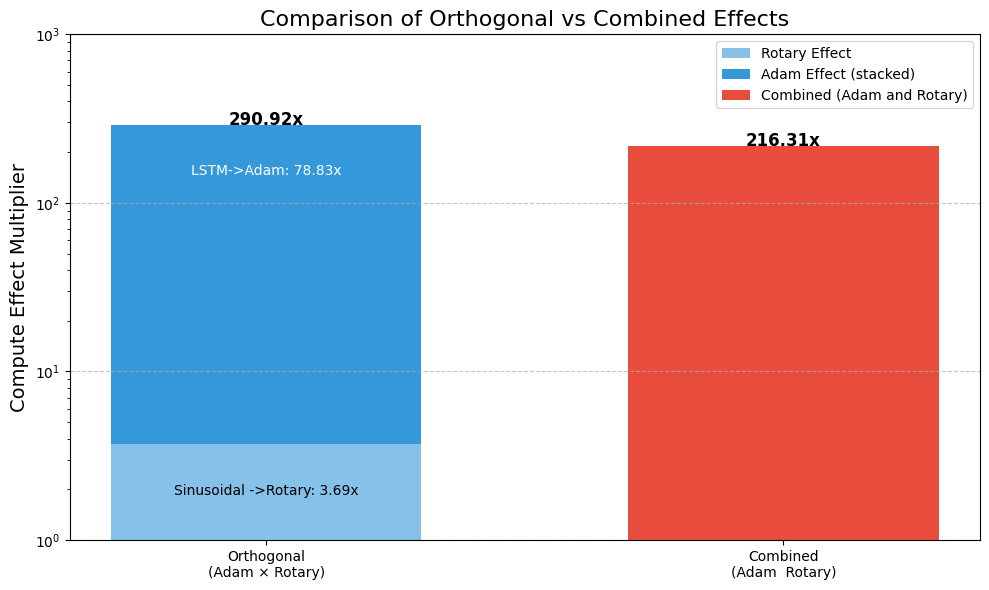

In [117]:
# Bar plot with stacked bar for Orthogonal (SGD × Rotary)
combined_effect_orthog = adam_estimate * effect_rotary
combined_effect_sgd_no_rotary = effect_sgd_no_rotary
print(effect_sgd)
print(effect_rotary)
print(combined_effect_orthog)
print(combined_effect_sgd_no_rotary)
# Set up bar positions
labels = ['Orthogonal\n(Adam × Rotary)', 'Combined\n(Adam  Rotary)']
x = [0, 1]

plt.figure(figsize=(10, 6))

# For the stacked bar, we want the total height to be combined_effect_orthog,
# with the bottom (Rotary) and the top (SGD) such that their sum is combined_effect_orthog.
# The rotary component is effect_rotary, the sgd component is (combined_effect_orthog - effect_rotary)
sgd_component_stacked = combined_effect_orthog - effect_rotary

# Plot the bottom part of the stacked bar (Rotary effect only)
bar_rotary = plt.bar(
    x[0], effect_rotary, color='#85C1E9', width=0.6, label='Rotary Effect'
)

# Plot the top part of the stacked bar (SGD effect, stacked on rotary)
bar_sgd = plt.bar(
    x[0], sgd_component_stacked, bottom=effect_rotary, color='#3498db', width=0.6, label='Adam Effect (stacked)'
)

# Plot the single bar for Combined (SGD No Rotary)
bar_combined = plt.bar(
    x[1], combined_effect_sgd_no_rotary, color='#e74c3c', width=0.6, label='Combined (Adam and Rotary)'
)

# Add value labels on top of bars
plt.text(
    x[0], combined_effect_orthog + 0.1,
    f'{combined_effect_orthog:.2f}x', ha='center', fontsize=12, fontweight='bold'
)
plt.text(
    x[0], effect_rotary + sgd_component_stacked/2,
    f'LSTM->Adam: {adam_estimate:.2f}x', ha='center', fontsize=10, color='white'
)
plt.text(
    x[0], effect_rotary/2,
    f'Sinusoidal ->Rotary: {effect_rotary:.2f}x', ha='center', fontsize=10, color='black'
)

# For combined bar
plt.text(
    x[1], combined_effect_sgd_no_rotary + 0.1,
    f'{combined_effect_sgd_no_rotary:.2f}x', ha='center', fontsize=12, fontweight='bold'
)

plt.xticks(x, labels)
plt.ylabel('Compute Effect Multiplier', fontsize=14)
plt.title('Comparison of Orthogonal vs Combined Effects', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.ylim(1, 1000)
plt.legend()
plt.tight_layout()
plt.show()


# LSTM-SGD Plot

14.726330404928593
14.936377977578116
1160.876625820521
123.94913579202836


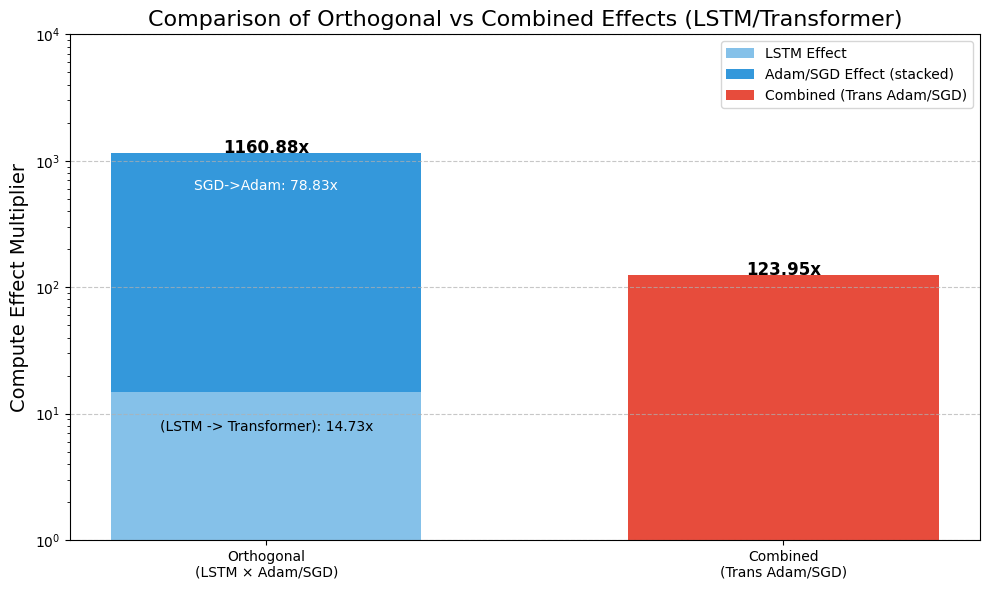

In [118]:
# combined_effect_orthog =   effect_trans_lstm*effect_lstm_adam_sgd
# combined_effect_trans_adam_sgd = effect_trans_lstm_adam_sgd





effect_sgd = 78.83
# Bar plot with stacked bar for Orthogonal (LSTM × Adam/SGD)
combined_effect_orthog = effect_trans_lstm * effect_sgd
combined_effect_trans_adam_sgd = effect_trans_lstm_adam_sgd
print(effect_trans_lstm)
print(effect_lstm_adam_sgd)
print(combined_effect_orthog)
print(combined_effect_trans_adam_sgd)

# Set up bar positions
labels = ['Orthogonal\n(LSTM × Adam/SGD)', 'Combined\n(Trans Adam/SGD)']
x = [0, 1]

plt.figure(figsize=(10, 6))

# For the stacked bar, we want the total height to be combined_effect_orthog,
# with the bottom (LSTM) and the top (Adam/SGD) such that their sum is combined_effect_orthog.
# The LSTM component is effect_trans_lstm, the Adam/SGD component is (combined_effect_orthog - effect_trans_lstm)
adam_sgd_component_stacked = combined_effect_orthog - effect_trans_lstm

# Plot the bottom part of the stacked bar (LSTM effect only)
bar_lstm = plt.bar(
    x[0], effect_trans_lstm, color='#85C1E9', width=0.6, label='LSTM Effect'
)

# Plot the top part of the stacked bar (Adam/SGD effect, stacked on LSTM)
bar_adam_sgd = plt.bar(
    x[0], adam_sgd_component_stacked, bottom=effect_trans_lstm, color='#3498db', width=0.6, label='Adam/SGD Effect (stacked)'
)

# Plot the single bar for Combined (Trans Adam/SGD)
bar_combined = plt.bar(
    x[1], combined_effect_trans_adam_sgd, color='#e74c3c', width=0.6, label='Combined (Trans Adam/SGD)'
)

# Add value labels on top of bars
plt.text(
    x[0], combined_effect_orthog + 0.1,
    f'{combined_effect_orthog:.2f}x', ha='center', fontsize=12, fontweight='bold'
)
plt.text(
    x[0], effect_trans_lstm + adam_sgd_component_stacked/2,
    f'SGD->Adam: {effect_sgd:.2f}x', ha='center', fontsize=10, color='white'
)
plt.text(
    x[0], effect_trans_lstm/2,
    f'(LSTM -> Transformer): {effect_trans_lstm:.2f}x', ha='center', fontsize=10, color='black'
)

# For combined bar
plt.text(
    x[1], combined_effect_trans_adam_sgd + 0.1,
    f'{combined_effect_trans_adam_sgd:.2f}x', ha='center', fontsize=12, fontweight='bold'
)

plt.xticks(x, labels)
plt.ylabel('Compute Effect Multiplier', fontsize=14)
plt.title('Comparison of Orthogonal vs Combined Effects (LSTM/Transformer)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.ylim(1, 10000)
plt.legend()
plt.tight_layout()
plt.show()




Searching for files with pattern: ../experimental_data_folder/lstm_optimizer/LSTMADAM*.csv
Searching for files with pattern: ../experimental_data_folder/lstm_optimizer/LSTMSGD*.csv
Searching for files with pattern: ../experimental_data_folder/Optimizer_Experiments/32d_adam*.csv
Searching for files with pattern: ../experimental_data_folder/Optimizer_Experiments/32d_sgd*.csv


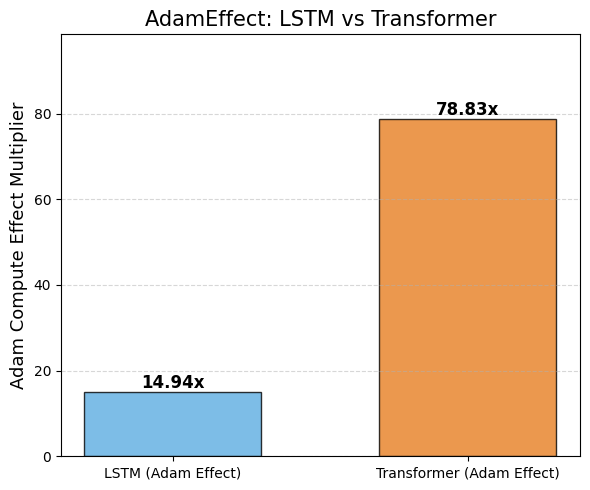

In [119]:
# Compute the SGD effect multipliers for LSTM and Transformer
sgd_effect_lstm = compute_multiplier_estimate("lstm_optimizer/LSTMADAM", "lstm_optimizer/LSTMSGD")[0]
sgd_effect_trans = compute_multiplier_estimate("Optimizer_Experiments/32d_adam", "Optimizer_Experiments/32d_sgd")[0]

# Bar plot to illustrate the differences
labels = ['LSTM (Adam Effect)', 'Transformer (Adam Effect)']
values = [sgd_effect_lstm, sgd_effect_trans]
colors = ['#5DADE2', '#E67E22']

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=colors, width=0.6, edgecolor='black', alpha=0.8)

# Add value labels on top of bars
for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        value + 0.05,
        f"{value:.2f}x",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.ylabel('Adam Compute Effect Multiplier', fontsize=13)
plt.title('AdamEffect: LSTM vs Transformer', fontsize=15)
plt.ylim(0, max(values) * 1.25)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()





#difference in adam effect between lstm and transformer